# YouTube statistika

Za svoj projekt sem si izbral analizo najbolj popularnih kanalov na YouTube-u. Podatke sem pobral s strani [SocialBlade](http://www.socialblade.com). Iz vsake kategorije sem pobral 100 najbolj popularnih kanalov glede na njihovo lestvico priljubljenosti.

In [1]:
import pandas as pd
%matplotlib inline

pd.options.display.max_rows = 20

In [2]:
podatki = pd.read_csv('podatki.csv', thousands=',', parse_dates=['date'])
podatki

,user,type,date,country,uploads,views,subs
0,2011flowerpower,animals,2011-01-29,ca,1,16182813,18118
1,20cissne,animals,2008-05-26,pe,237,44229511,33193
2,aaaz38,animals,2010-01-24,ua,646,16724438,14306
3,alejitis12,animals,2008-10-03,co,19,43675266,19378
4,aleshkanelepiy,animals,2010-08-27,de,6,3405694,754
5,andrewucles,animals,2012-07-09,au,55,92595214,434662
6,animalaidunlimited,animals,2008-08-02,in,80,87871741,214886
7,animaleg2014,animals,2014-04-04,eg,195,62015409,49295
8,animalwire,animals,2012-10-09,us,130,157317509,222740
9,animalztv4u,animals,2014-05-20,us,98,23447775,54649


Za začetek si oglejmo, kateri kanali imajo največ ogledov, da dobimo občutek o velikostnem razredu številk.

In [7]:
podatki[['user', 'views', 'type']].sort_values(['views'], ascending=False).head(15)

,user,views,type
1165,pewdiepie,11187386766,people
828,emimusic,10062249774,music
423,disneycollectorbr,9804088769,entertainment
845,justinbiebervevo,9084593026,music
891,taylorswiftvevo,7991781871,music
875,rihannavevo,7929848998,music
433,getmovies,7402950570,entertainment
1394,wwefannation,7328735583,sports
888,spinninrec,7092030652,music
846,katyperryvevo,6966864661,music


Podatkom dodamo dodatne stolpce za kasnejšo analizo:
* **primerjava** je razmerje med naročniki in ogledi v procentih
* **primerjava1** nam pove povprečno število ogledov na posamezen video
* v zadnji stolpec iz datuma zapišemo samo leto, po katerem bomo kasneje primerjali

In [3]:
podatki['primerjava'] = podatki['subs'] / podatki['views'] * 100
podatki['primerjava1'] = podatki['views'] / podatki['uploads']
podatki['year'] = podatki['date'].map(lambda x: x.year)
podatki

,user,type,date,country,uploads,views,subs,primerjava,primerjava1,year
0,2011flowerpower,animals,2011-01-29,ca,1,16182813,18118,0.111958,16182813.000000,2011
1,20cissne,animals,2008-05-26,pe,237,44229511,33193,0.075047,186622.409283,2008
2,aaaz38,animals,2010-01-24,ua,646,16724438,14306,0.085539,25889.222910,2010
3,alejitis12,animals,2008-10-03,co,19,43675266,19378,0.044368,2298698.210526,2008
4,aleshkanelepiy,animals,2010-08-27,de,6,3405694,754,0.022139,567615.666667,2010
5,andrewucles,animals,2012-07-09,au,55,92595214,434662,0.469422,1683549.345455,2012
6,animalaidunlimited,animals,2008-08-02,in,80,87871741,214886,0.244545,1098396.762500,2008
7,animaleg2014,animals,2014-04-04,eg,195,62015409,49295,0.079488,318027.738462,2014
8,animalwire,animals,2012-10-09,us,130,157317509,222740,0.141586,1210134.684615,2012
9,animalztv4u,animals,2014-05-20,us,98,23447775,54649,0.233067,239263.010204,2014


Podatke združimo po letih, da vidimo, kako so razporejeni glede na leto nastanka. Na grafu se pokaže, da je vsako leto več kanalov, ki so med najbolj popularnimi, če ne upoštevamo zadnjih parih let (mlajši kanali še niso imeli dovolj časa, da pridobijo oglede in naročnike).

In [18]:
podatki.groupby('year').size()

year
1969      1
2005     24
2006    194
2007    130
2008    123
2009    152
2010    160
2011    203
2012    260
2013    199
2014    151
2015      2
dtype: int64

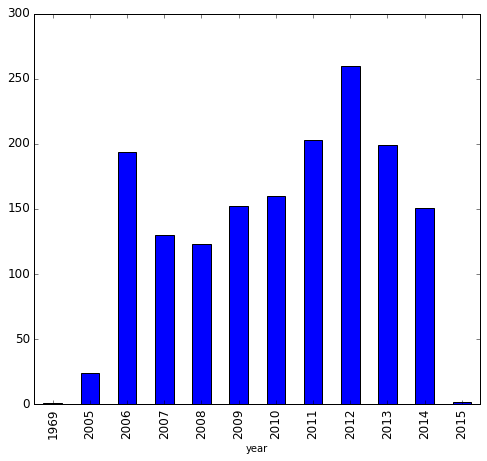

In [19]:
podatki.groupby('year').size().plot(kind='bar', figsize=(8, 7), fontsize=12)

Če podatke združimo po letih in kategorijah, si lahko ogledamo popularnost posameznih zvrsti kanalov skozi leta.

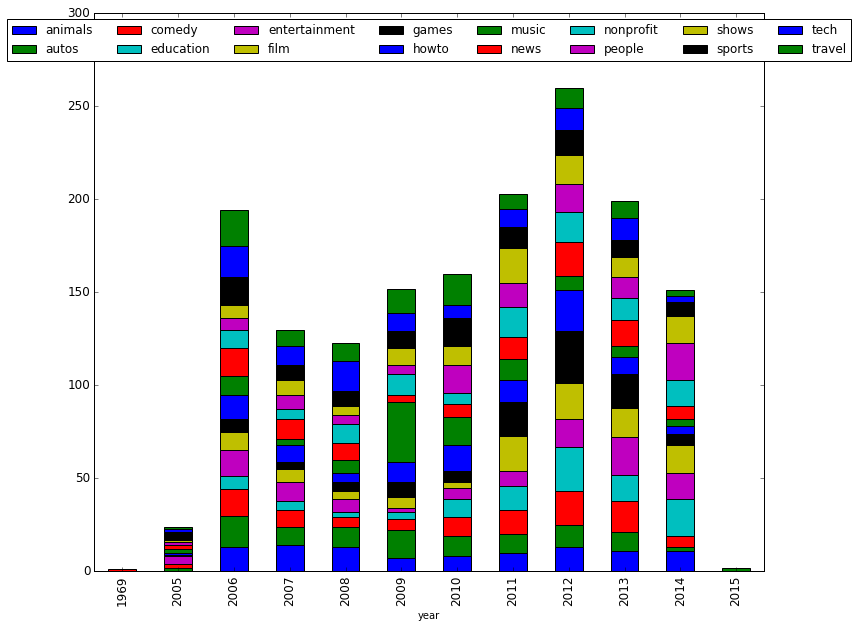

In [108]:
graf = podatki.groupby(['year', 'type']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 10), fontsize=12)
graf.legend(loc=9, ncol=8)

Leta 2009 je bilo izjemno veliko novo ustanovljenih glasbenih kanalov, v zadnjih letih pa je vse več kanalov iz kategorij filmi in računalniške igrice.

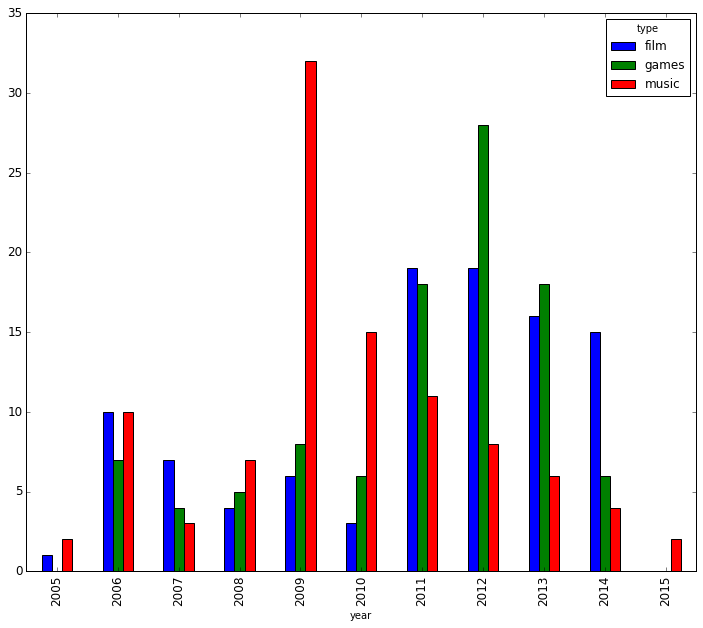

In [45]:
podatki[(podatki.type == 'music') | (podatki.type == 'games') | (podatki.type == 'film')]\
        .groupby(['year', 'type']).size().unstack().plot(kind='bar', figsize=(12, 10), fontsize=12)

Sedaj bomo primerjali kanale glede na kategorije.

In [6]:
zvrsti = podatki[podatki.uploads > 0].groupby('type')

Pri povprečnih ogledih celotnega kanala in ogledih na posamezni video so glasbeni kanali daleč v ospredju. Sledijo jim razvedrilni kanali, filmski in komedijski kanali.

In [13]:
zvrsti['views'].mean().sort_values(ascending=False)

type
music            2698788594
entertainment    1741877832
games            1214138588
comedy            855065059
film              781578193
education         611379222
people            560825059
news              425354300
howto             375053947
sports            319119785
tech              241089025
shows             198424042
autos             150991937
animals           138202146
travel            100763306
nonprofit          57608846
Name: views, dtype: int64

In [57]:
zvrsti['primerjava1'].mean().sort_values(ascending=False)

type
music            25527626.105094
film              4883376.136688
education         3394752.777144
comedy            2658544.144560
entertainment     2304371.405040
travel            1874007.885352
sports            1185882.629731
people            1156667.610129
games             1069987.645142
animals           1062518.717129
howto              962843.958046
nonprofit          820911.476593
tech               557585.436221
shows              488299.299568
autos              363687.047745
news               145451.284101
Name: primerjava1, dtype: float64

Če pa pogledamo primerjavo med naročniki in skupnimi ogledi vidimo, da se za naročnino na glasbene, filmske ali razvedrilne kanale odloči zelo majhen delež uporabnikov. Veliko večji delež je pri bolj znanstevnih kanalih (tech in howto), ki pa pri skupnem številu ogledov nista v ospredju.

In [58]:
zvrsti['primerjava'].mean().sort_values(ascending=False)

type
howto            0.677534
comedy           0.652859
tech             0.560826
sports           0.489835
people           0.382873
shows            0.333428
games            0.327407
nonprofit        0.316435
autos            0.291169
travel           0.241548
animals          0.210169
education        0.202212
music            0.197921
news             0.190080
entertainment    0.159663
film             0.128914
Name: primerjava, dtype: float64

Prejšnji komentar približno potrjuje tudi sledeča tabela: ko skupno število ogledov narašča, razmerje med ogledi in naročniki praviloma pada.

In [64]:
zvrsti[['views', 'primerjava']].mean().sort_values('views', ascending=False).corr()

,views,primerjava
views,1.00000,-0.26724
primerjava,-0.26724,1.00000


Glede na število objavljenih videov pa pričakovano vodijo kanali, ki nas obveščajo v trenutnih dogodkih (novice, športni kanali, oddaje).

In [47]:
zvrsti['uploads'].mean().sort_values(ascending=False)

type
news             30326.890000
sports            6641.660000
shows             4017.434343
entertainment     3899.950000
games             3099.290000
tech              2454.848485
nonprofit         2108.670000
travel            1984.180000
people            1880.840000
film              1850.080000
autos             1340.070000
music             1231.570000
howto             1003.750000
comedy             694.660000
animals            540.670000
education          442.440000
Name: uploads, dtype: float64

Če primerjamo povprečne kanale glede na zvrst, imajo novice skoraj toliko videov kot vse ostale zvrsti skupaj.

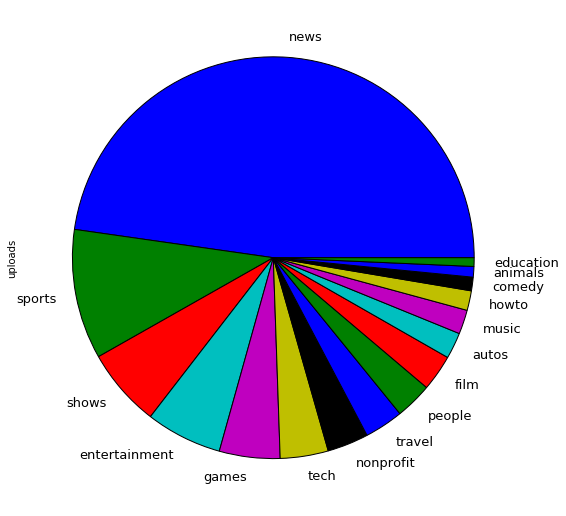

In [8]:
zvrsti['uploads'].mean().sort_values(ascending=False).plot(kind='pie', figsize=(9, 9), fontsize=13)

Za konec si oglejmo še statistiko kanalov glede na države iz katerih prihajajo. Iz Združenih držav Amerike prihaja skoraj 40% vseh kanalov. Z veliko razliko ji sledijo Velika Britanija, Rusija, Brazilija in Indija.

In [4]:
podatki.groupby('country').size().sort_values(ascending=False)[:15]

country
us    614
gb    103
ru     92
br     59
in     57
es     48
jp     48
ca     46
kr     46
de     45
fr     33
mx     32
au     28
tr     27
th     26
dtype: int64

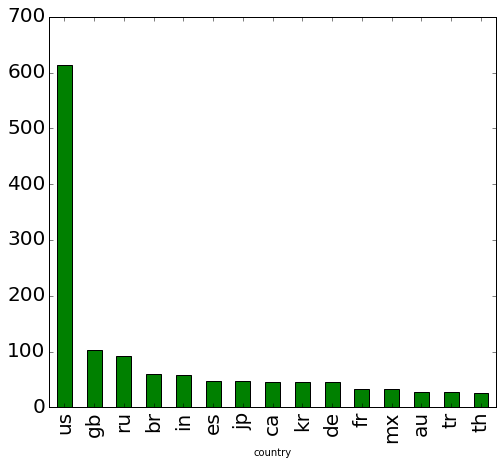

In [5]:
graf1 = podatki.groupby('country').size().sort_values(ascending=False)[:15]\
    .plot(kind='bar', figsize=(8, 7), fontsize=20, color='g')